# Pre-processing of volume details data and its EDA

In [1]:
## importing libraries and loading data

import numpy as np 
import pandas as pd

In [20]:
pd.set_option("display.max_row", 1000)
pd.set_option("display.max_column", 30)

In [12]:
data_volumne = pd.read_csv(r"C:\Users\saiba\OneDrive\Documents\Data Analysis Projects\Project 11 - Identify Consignments With Wrong Weight -Volume During Pick-up\Data\P2_consignment_volume_data.csv")
data_volumne.head()

,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
0,32123,31.0,12.0,15.0,IN,1,NaN
1,32124,22.0,8.0,12.0,IN,2,NaN
2,32124,23.0,13.0,11.0,IN,4,NaN
3,32124,20.0,11.0,13.0,IN,8,NaN
4,32125,31.0,12.0,15.0,IN,1,NaN


In [14]:
data_consign = pd.read_csv(r"C:\Users\saiba\OneDrive\Documents\Data Analysis Projects\Project 11 - Identify Consignments With Wrong Weight -Volume During Pick-up\Data\P2_consignment_data.csv")
data_consign.head()

,id,created_date,cnote,client_id,weight,Volume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date,cpm
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01,1
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1
2,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38,1
3,32126,15-01-2019 00:01,8000574330,1114,68.0,11.16,4,3PL,Yes,1,18-01-2019 17:42,0
4,32127,15-01-2019 00:02,1002478259,1115,1075.0,73.35,50,CHEMICALS,Yes,1,22-01-2019 17:29,1


In [16]:
data_consign.shape, data_volumne.shape

((86663, 12), (149487, 7))

In [15]:
data_volumne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149487 entries, 0 to 149486
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   consignment_id   149487 non-null  int64  
 1   length           149487 non-null  float64
 2   breadth          149487 non-null  float64
 3   height           149487 non-null  float64
 4   unit             149487 non-null  object 
 5   number_of_boxes  149487 non-null  int64  
 6   created_at       0 non-null       float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.0+ MB


In [11]:
## basic data processing

data.unit.value_counts()

IN    127861
CM     21626
Name: unit, dtype: int64

## step - 1 
**Create a summary where dimensions are captured in Inches and CM as given in the below-expected data frame/table using the volume details table**

In [17]:
## merging two dataframe

data = pd.merge(data_consign, data_volumne, left_on = 'id', right_on = 'consignment_id', how = 'left')

In [23]:
data.head()

,id,created_date,cnote,client_id,weight,Volume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date,cpm,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01,1,32123,31.0,12.0,15.0,IN,1,NaN
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1,32124,22.0,8.0,12.0,IN,2,NaN
2,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1,32124,23.0,13.0,11.0,IN,4,NaN
3,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1,32124,20.0,11.0,13.0,IN,8,NaN
4,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38,1,32125,31.0,12.0,15.0,IN,1,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149487 entries, 0 to 149486
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               149487 non-null  int64  
 1   created_date     149487 non-null  object 
 2   cnote            149487 non-null  object 
 3   client_id        149487 non-null  int64  
 4   weight           149487 non-null  float64
 5   Volume           149487 non-null  float64
 6   total_boxes      149487 non-null  int64  
 7   industry_type    149487 non-null  object 
 8   QC_Validation    149487 non-null  object 
 9   delivered        149487 non-null  int64  
 10  Delivery_Date    107905 non-null  object 
 11  cpm              149487 non-null  int64  
 12  consignment_id   149487 non-null  int64  
 13  length           149487 non-null  float64
 14  breadth          149487 non-null  float64
 15  height           149487 non-null  float64
 16  unit             149487 non-null  obje

In [52]:
## we will select only those columns that are important for creating the new dataframe

final_data = data[['id', 'industry_type', 'unit', 'number_of_boxes']]
final_data.head()

,id,industry_type,unit,number_of_boxes
0,32123,APPAREL,IN,1
1,32124,3PL,IN,2
2,32124,3PL,IN,4
3,32124,3PL,IN,8
4,32125,APPAREL,IN,1


In [53]:
final_data.unit.value_counts()

IN    127861
CM     21626
Name: unit, dtype: int64

In [55]:
## creating a new dataframe that will contain the number of boxes by each client_id and each industry_type

summary_data = final_data.groupby(['id', 'industry_type', 'unit'])['number_of_boxes'].sum().reset_index()
summary_data

,id,industry_type,unit,number_of_boxes
0,32123,APPAREL,IN,1
1,32124,3PL,IN,14
2,32125,APPAREL,IN,1
3,32126,3PL,CM,4
4,32127,CHEMICALS,IN,50
...,...,...,...,...
86658,118781,ELECTRONICS,IN,34
86659,118782,ELECTRONICS,IN,24
86660,118783,ELECTRONICS,IN,56
86661,118784,NON-ECOMMERCE,IN,2


In [70]:
## final dataframe that will store the result as mentioned,

## pivot table 
pivot_data = summary_data.pivot_table(index = ['id', 'industry_type', 'unit'], 
                                      columns = 'unit',
                                     values = 'number_of_boxes', fill_value = 0).reset_index()

'''the `pivot_data` df will be maintained by `id`,`industry_type` and `unit` and
   values will be determined by number of boxes and new columns will be created by different unit types.'''

output_2 = pivot_data.rename(columns = {'id': 'Client ID', 'unit':'Inch/CM Cleint', 
                                          'CM':'Number of Boxes in CM',
                                          'IN' : 'Number of Boxes in INCH'})

output_2.head()

unit,Client ID,industry_type,Inch/CM Cleint,Number of Boxes in CM,Number of Boxes in INCH
0,32123,APPAREL,IN,0,1
1,32124,3PL,IN,0,14
2,32125,APPAREL,IN,0,1
3,32126,3PL,CM,4,0
4,32127,CHEMICALS,IN,0,50


In [72]:
## final result

output_2.loc[(output_2['Inch/CM Cleint'] == "IN"), 'Inch/CM Cleint'] = "Inch Client"
output_2.loc[(output_2['Inch/CM Cleint'] == "CM"), 'Inch/CM Cleint'] = "Cm Client"

In [73]:
## observing the result
output_2.head()

unit,Client ID,industry_type,Inch/CM Cleint,Number of Boxes in CM,Number of Boxes in INCH
0,32123,APPAREL,Inch Client,0,1
1,32124,3PL,Inch Client,0,14
2,32125,APPAREL,Inch Client,0,1
3,32126,3PL,Cm Client,4,0
4,32127,CHEMICALS,Inch Client,0,50


In [74]:
output_2.columns

Index(['Client ID', 'industry_type', 'Inch/CM Cleint', 'Number of Boxes in CM',
       'Number of Boxes in INCH'],
      dtype='object', name='unit')

In [76]:
## ordering the columns

column_order = ['Client ID', 'industry_type', 'Number of Boxes in CM',
       'Number of Boxes in INCH','Inch/CM Cleint']

## reorder the columns

output_2 = output_2[column_order]

In [77]:
## final results

output_2.head()

unit,Client ID,industry_type,Number of Boxes in CM,Number of Boxes in INCH,Inch/CM Cleint
0,32123,APPAREL,0,1,Inch Client
1,32124,3PL,0,14,Inch Client
2,32125,APPAREL,0,1,Inch Client
3,32126,3PL,4,0,Cm Client
4,32127,CHEMICALS,0,50,Inch Client


## step - 2
**Preprocessing of volume details data: Sorting of length, breadth, and height at consignment level i.e, Maximum dimensions are considered as length and similarly minimum dimensions need to be considered as heights**

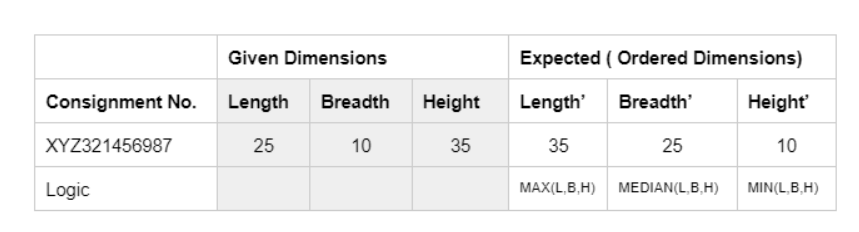

In [97]:
## will be selecting only needed columns from the merge dataframe `data` for this task

consign_data = data[['cnote', 'length', 'breadth', 'height']]

consign_data.head()

,cnote,length,breadth,height
0,8000522895,31.0,12.0,15.0
1,8000119761,22.0,8.0,12.0
2,8000119761,23.0,13.0,11.0
3,8000119761,20.0,11.0,13.0
4,8000522921,31.0,12.0,15.0


In [98]:
# data.columns

In [99]:
## creating new columns

exp_length = []  #expected Lenght
exp_breadth = []  #expected breadth
exp_height = []  #expected height

for i in range(consign_data.shape[0]):
    exp_length.append(np.max([consign_data.length[i], consign_data.breadth[i], consign_data.height[i]]))
    exp_breadth.append(np.mean([consign_data.length[i], consign_data.breadth[i], consign_data.height[i]]))
    exp_height.append(np.min([consign_data.length[i], consign_data.breadth[i], consign_data.height[i]]))


In [102]:
## final output after step - 2

consign_data.loc[:, 'EXP Length'] = exp_length
consign_data.loc[:, 'EXP Breadth'] = exp_breadth
consign_data.loc[:, 'EXP Height'] = exp_height

C:\Users\saiba\AppData\Local\Temp\ipykernel_9480\3959108343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consign_data.loc[:, 'EXP Length'] = exp_length
C:\Users\saiba\AppData\Local\Temp\ipykernel_9480\3959108343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consign_data.loc[:, 'EXP Breadth'] = exp_breadth
C:\Users\saiba\AppData\Local\Temp\ipykernel_9480\3959108343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [104]:
consign_data = consign_data.rename(columns = {'cnote': "Consignment No"}).set_index('Consignment No')

In [106]:
## final overview of results
consign_data.head()

,length,breadth,height,EXP Length,EXP Breadth,EXP Height
Consignment No,,,,,,
8000522895,31.0,12.0,15.0,31.0,19.333333,12.0
8000119761,22.0,8.0,12.0,22.0,14.000000,8.0
8000119761,23.0,13.0,11.0,23.0,15.666667,11.0
8000119761,20.0,11.0,13.0,20.0,14.666667,11.0
8000522921,31.0,12.0,15.0,31.0,19.333333,12.0


## step - 3 
**Normalizing the units - since we have already client category basis the the unit (INCH clients/ CM clients)- need to convert all the units either into INCH or CM ( suggesting to create a separate column with the converted units for your model building)**

In [107]:
output_2.head()

unit,Client ID,industry_type,Number of Boxes in CM,Number of Boxes in INCH,Inch/CM Cleint
0,32123,APPAREL,0,1,Inch Client
1,32124,3PL,0,14,Inch Client
2,32125,APPAREL,0,1,Inch Client
3,32126,3PL,4,0,Cm Client
4,32127,CHEMICALS,0,50,Inch Client
